<div>
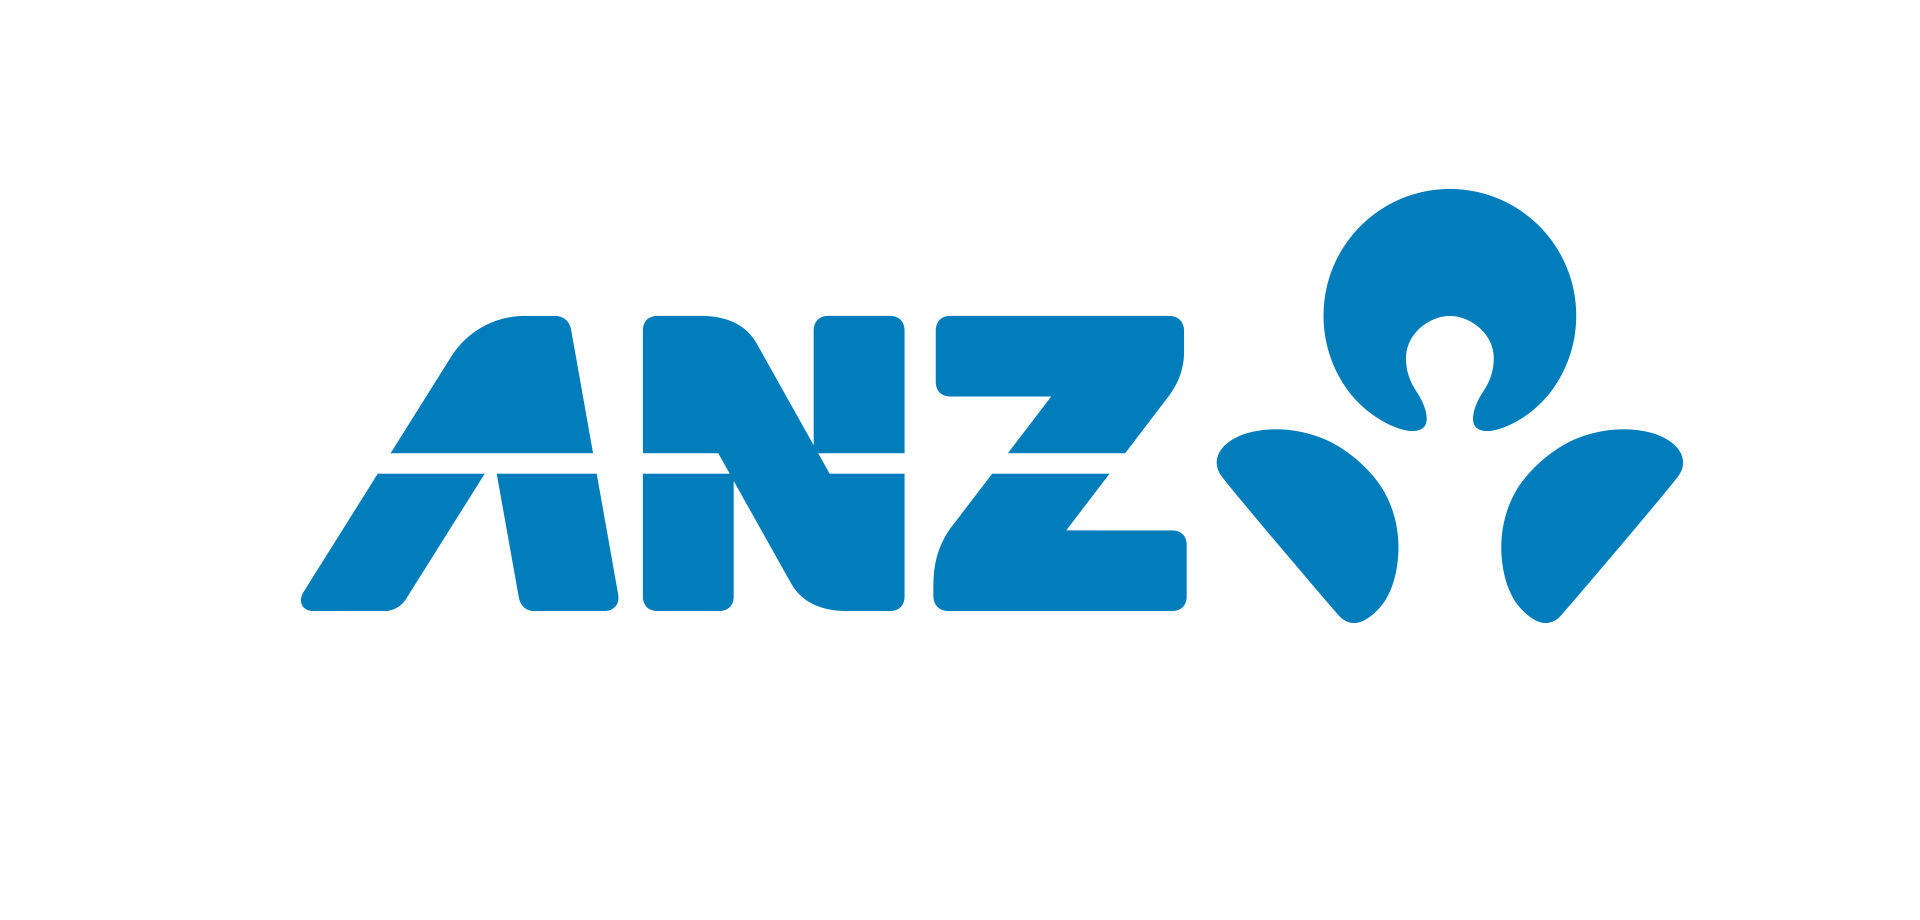
</div>

> **Program:** ANZ Virtual Internship Program <br>
> **Project Title:** Data@ANZ<br>
> **Intern:** David Adarkwah <br>
> **Email:** davidwyse48@gmail.com 

## Table of Contents

* [Business Problem Understanding](#bpu)
    * [Problem Statement](#ps)
    * [Hypothesis](#hs)
    * [Project Goal](#pg)
    * [Information Needed](#in)
    * [Methodology](#my)
* [Data Preparation](#dp)
    * [Data Quality Assessment](#dqa)
    * [Data Cleaning and Preprocessing](#dcp)
* [Exploratory Data Analysis](#eda) 
* [Statistical Analysis](#sa)
    * [Removing Outliers](#ro)
    * [Normality Test](#nt)
    * [Box-Cos Transformation](#bct)
    * [Welch's t-Test](#wt)
    * [Effect Size](#es)
    * [Confidence Interval](#ci)
* [Feature Engineering and Selection](#fes)
* [Data Modeling](#dm)
    * [Data Understanding](#du)
        * [Descriptive Statistics](#ds)
        * [Data Visualization](#dv)
    * [Splitting Dataset](#sd)
    * [Algorithm Evaluation](#ae)
    * [Parameter Tuning](#pt)
    * [Final Model](#fm)
    * [Model Understanding](#mu)
    * [Save Model](#sm)
* [Conclusion and Recommendation](#cr)
* [References](#r)

## 1. Business Problem Understanding<a id='bpu'></a>

<p style="text-align:justify;">The first step in approaching a data science problem is problem understanding. This step is very important since it allows us to know the kind of decisions we want to make, the information or data that will be needed to inform those decisions and finally, the kind of analysis that will be used to arrive at those decisions. In a nutshell, developing a mental model of the problem allows us to properly structure potentially relevant information needed to solve the problem.</p>

### 1.1 Problem Statement <a id='ps'></a>

<p style="text-align:justify;">ANZ have a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions. Based on this dataset, ANZ will want to understand the behaviours of their customers and how transactions are undertaken by each hypothetical customer and finally, be able to predict the annual salary of their present and potential customers.</p>

### 1.2 Hypothesis <a id='hs'></a>

<p style="text-align:justify;">It is possible to predict the annual salary for each customer using a predictive model. The hypothesis to be considered is that the annual salary for each customer can be estimated based on a couple of factors such as age and purchasing behaviour of the customer.</p>

### 1.3 Project Goal <a id='pg'></a>

<p style="text-align:justify;">In this project, we will seek to achieve 2 main goals and they are;</p>

* Segment dataset and draw unique insights, including visualization of the transaction volume and assessing the effect of any outliers.
* Explore correlation between customer attributes and build a regression and a decision-tree prediction model based on your findings. 

### 1.4 Information Needed <a id='in'></a>

<p style="text-align:justify;">In order to test the hypothesis of whether annual salary can be estimated using the age and purchasing behaviour of the customers, we would need to acquire the data needed to test the hypothesis and perform Exploratory Data Analysis to discover more insights about other factors that might help us predict annual salary of customers, which will allow us to make plausible decisions.</p>

We would need the following data to be able to perform EDA and build our models.
1. <p style="text-align:justify;"><b>Customer data</b> - which should include characteristics of each customer, for example, age, education, transaction mode of customer etc.</p>
2. <b>Salary data</b> - which would indicate current salary of customers.
3. <p style="text-align:justify;"><b>Historical transaction data</b> – which should indicate every transaction the customer has performed.</p>

### 1.5 Methodology <a id='my'></a>

<p style="text-align:justify;">The methodology that will be used for our project will largely depend on the goals we set out to achieve. The methodlogy framework below gives us a comprehensive guide on the methodology apparoach that will help us achieve our goals.</p>
<br>
<p style="text-align:center;font-weight:bold;font-size:20px"> Methodology Framework</p>
<br>
<img src='https://artofdatablog.files.wordpress.com/2017/10/methodology-map.jpg' style="float:center;width:700px;">
<p style="text-align:justify;">Once we have the data, we would need to engineer features based on the data that we obtain, and build a model suitable for continuous numeric predictions (e.g., Linear Regression, Decision Tree, Random Forest, Gradient Boosted Machines to name a few), picking the most appropriate model based on the tradeoff between the complexity, the understanding, and the accuracy of the models. </p>

## 2. Data Preparation <a id='dp'></a>

<p style="text-align:justify;"> An understanding of the data coupled with problem understanding will help us in cleaning and preparing our data for analysis. It is usually rare to acquire a ready-to-use data for any analysis without some level of preparation. To prepare our data, we  normally assess the quality of the data, cleanse, format, blend and sample the data since we may encounter various issues with columns in our data. These issues can include:</p>

* **`Missing values:`** meaning column values are incomplete
* **`Incorrect data:`** meaning you see values not expected for the column name
* **`Inconsistent values:`** meaning some values may fall outside the expected range
* **`uniqueness:`** meaning whether or not there are duplicate values
* **`inconsistent data type:`** meaning values entered in the columns may not be consistent with the column names

To properly prepare our data for analysis, we will perform two important tasks which are;

* Part I: Data Quality Assessment
* Part II: Data Cleaning and Preprocessing 

### 2.1 Data Quality Assessment <a id='dqa'></a>

<p style="text-align:justify;">The first task that we will perform under the data preparation step is initial assessment of the quality of data which will easily allow us to properly clean our data. We will use this section to write any code necesary for inspecting the dataset. Once completed, we will leave our report in the Data Quality Report Document.

At the end of our inspection, we will provide a summary of all of our findings.</p>

In [1]:
# we will import the libraries we will need for the data preparation step

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import os
import datetime
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import ttest_ind
import scipy.stats as st
from scipy.special import inv_boxcox
import random
import json
import warnings

warnings.filterwarnings('ignore')
sns.set(color_codes=True)
pd.set_option('display.max_columns',100)
%matplotlib inline

In [2]:
# load data using pandas

data = pd.read_csv('data/anz.csv')

In [3]:
# inspect the shape of the dataframe

print(data.shape)

(12043, 23)


---
>We can see from the above results that we have <b>12043</b> observations and <b>23</b> columns. The data is rich enough to help us perform our analysis as well as build the predictive models. However, we will have to assess the quality of the data and make the necessary cleaning before setting out to achieve our goals.
---

In this step we will be assessing the quality of purchasing data and make all the possible recommendation for cleaning this data.

In [4]:
# data information

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [5]:
# data information

data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


We will proceed by checking if the data contain any missing values. We can easily tell from the results of the info but we want to be extremely sure there are no missing values

In [6]:
# function to determine the percentage of missing values in our data

def missing_values(data):
    """Function that checks for null values and computes the percentage of null values
    Args:
        data: loaded dataframe
    Return:
        dataframe: dataframe of total null values with corresponding percentages
    """
    total = data.isnull().sum().sort_values(ascending=False)   # create an empty datafram
    percentage = round((total / data.shape[0]) * 100, 2)
    
    return pd.concat([total, percentage], axis=1, keys=['Total','Percentage'])

In [7]:
# call the missing values function on data1

missing_values(data)

,Total,Percentage
merchant_code,11160,92.67
bpay_biller_code,11158,92.65
merchant_suburb,4326,35.92
merchant_long_lat,4326,35.92
merchant_id,4326,35.92
card_present_flag,4326,35.92
merchant_state,4326,35.92
status,0,0.00
customer_id,0,0.00
country,0,0.00


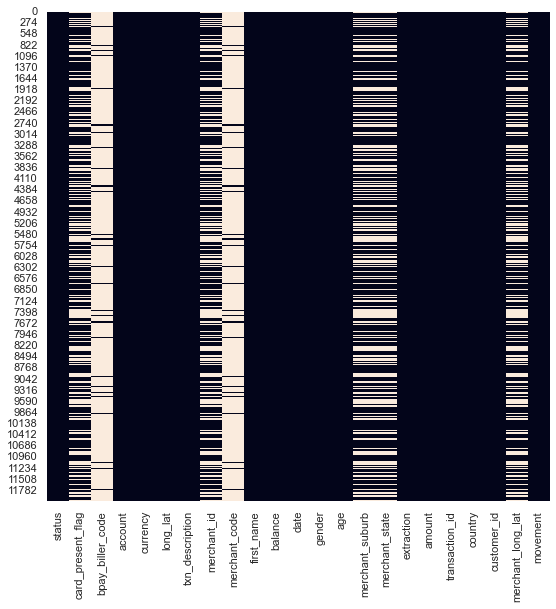

In [8]:
# visualize the extent of the missing values

plt.figure(figsize=(9,9))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

#### Data Quality Summary:

<p style="text-align:justify;">This data presents a lot of opportunity for data cleaning. This is because most of the features have issues that has to be resolved both objectively and subjectively. Subjectively because you will have to tell which columns will not be needed for various reasons and then consequently drop them.</p>

<p style="text-align:justify;">Based on the ouputs displayed above, here is the summary of the data quality issues which have to be fixed during the data cleaning process:</p><br>

* Because of the huge null values in some of the columns, we will have to drop the entire column with missing values percentage greater than 60% inorder not to affect the overall number of obsrvations. Columns to drop include:
    * merchant_code
    * bpay_biller_code


* Also, we can see that there are some columns that will not be needed both for the analysis we seek to perform and model  building. These columns are:
    * account (customer account numbers wont be needed for the task ahead)
    * currency (because its all in AUD based on the summary statistics results)
    * country (because all customers are from Australia)


* We also need to properly format the data types for some of the columns which include:
    * long_lat (split the values and format to int data type)
    * date (format to datetime object)
    * extraction (format to datetime objects. Similar to the date column and we might possibly drop it)
    * merchant_long_lat (split and format to int data type)


* <p style="text-align:justify;">Finally, based on the analysis we want to perform we might engineer new features.</p>

### 2.2 Data Cleaning and Preprocessing<a id='dcp'></a>

<p style="text-align:justify">The preprocessing step (usually an iterative process) is carried out to clean the data based on data quality issues identified. During the data quality assessment, we identified various data quality issues including missing values, incorrect data, inconsistent values, etc. 

In this task we will perform all the initial data cleaning and preprocessing needed to produce data that will be suitable for our analysis.</p>

#### Handling Missing Values

In this step, we will drop columns with high percentage of missing values. The columns with less percentage of missing values will be either dropped or imputed during model building.

In [9]:
# We are dropping based on percentage of missing values (greater than 60%).

data = data.drop(columns=['merchant_code', 'bpay_biller_code'])

#### Dropping Unneeded Columns

We highlighted during the data quality assessment that there are some columns that won't be needed for both our analysis and model building. Therefore, we will have to drop those columns entirely.

In [10]:
# columns have single values

data.nunique()

status                   2
card_present_flag        2
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [11]:
# We are dropping irrelevant columns.

data = data.drop(columns=['account', 'currency', 'country'])

#### Date Formatting

The date column for this data will be formatted to datetime objects. We must note that the extraction column contains both date and time which will need to be formatted to a datetime object. This column shows transactions performed for different times within a day but the date of the transaction is similar to the dates column. Since we only interested in the day the transaction was made and not the specific time, we will drop the extraction column and base our analysis on the date column.

In [12]:
# We are dropping extraction column.

data = data.drop(columns=['extraction'])

Now we will go ahead and format the date column to a datetime object.

In [13]:
# transform the dates to datetime objects for easy access of dates

data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

#### Formatting Longitude and Latitude Column

In this step we will split the values for both `long_lat` column and `merchant_long_lat` column and assign the values to both longitude and latitude

In [14]:
# splitting and formatting long_lat column

data['longitude'] = [float(data.split('-')[0].strip()) for data in data['long_lat']]
data['latitude'] = [float(data.split('-')[1].strip()) for data in data['long_lat']]

In [15]:
# splitting and formatting merchant_long_lat column

data['merchant_longitude'] = [float(data.split('-')[0].strip()) if str(data) != 'nan' else np.nan 
                                for data in data['merchant_long_lat']]
    
data['merchant_latitude'] =  [float(data.split('-')[1].strip()) if str(data) != 'nan' else np.nan 
                                for data in data['merchant_long_lat']]

After creating these new columns, we will have to remove the `long_lat` and `merchant_long_lat` columns 

In [16]:
# dropping previous columns

data = data.drop(columns=['long_lat', 'merchant_long_lat'])

In [17]:
# have a glimpse of the data

data.head(2)

,status,card_present_flag,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,longitude,latitude,merchant_longitude,merchant_latitude
0,authorized,1.0,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,debit,153.41,27.95,153.38,27.99
1,authorized,0.0,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,debit,153.41,27.95,151.21,33.87


After the data cleaning and preprocessing step comes the exploratory data analysis task. In this step we will explore our data to discover hidden trends and generate new insights which will lead us to better understand the customers.

## 3. Exploratory Data Analysis<a id='eda'></a>

<p style="text-align:justify;">One of the goals for this project as mentioned earlier is to segment dataset and draw unique insights, including visualization of the transaction volume and assessing the effect of any outliers. Based on this stated goal, we will perform any set of analysis to obtain insights that can help us arrive at some plausible conclusions.</p>

To achieve the first goal, we will look at general distirbutions of our features and try to answer the questions listed below:

* What is the age distribution of the customers?
* What is the amount distribution of the customers?
* Are males performing more transactions as compared to females?
* Which transaction movement happens for most of the customers?
* How much do customers spend on the average?
* Are most of the transactions authorized?
* Between males and females, who spends a lot?
* Which suburb do most of the transactions take place?
* How does spending vary with state?
* How did the average amount spent by customers changed over time ( days, weeks)?

<b>NB: Questions that can be answered are not limited to the ones stated above.</b>

Before we generate insights from the data, we will define helper functions to help us visualize the data.

In [18]:
layout = {'autosize': False,
    'width': 950,
    'height': 600,
    "xaxis": dict(titlefont=dict(size=15), visible=False),
    'yaxis': dict(titlefont=dict(size=15),),
    'paper_bgcolor': 'rgba(0,0,0,0)',
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'title_x': 0.5,
    'yaxis': {'categoryorder':'total ascending'}
    }

layout2 = {'autosize': False,
    'width': 950,
    'height': 600,
    "xaxis": dict(titlefont=dict(size=15), visible=True),
    'yaxis': dict(titlefont=dict(size=15), visible=False),
    'paper_bgcolor': 'rgba(0,0,0,0)',
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'title_x': 0.5,
    'yaxis': {'categoryorder':'total descending'}
    }

def bar_chart(data, x_col, y_col, text, title, x_title, y_title):
    fig = px.bar(data, x=x_col, y=y_col, orientation='h', text=text, color_discrete_sequence=px.colors.qualitative.D3)
    fig.update_traces(texttemplate='%{text:.1s}',textposition='outside',textfont={'family':"Arial",'size': 12,'color': "black"})
    fig.update_xaxes(title_text=x_title, automargin=True)
    fig.update_yaxes(title_text=y_title, automargin=True)
    fig.update_layout(layout, title_text = title, xaxis =dict(visible=False))
    fig.show('png')


def facet_row_bar(data, x_col, y_col, facet_row, text, title):
    fig = px.bar(data, x=x_col, y=y_col, orientation='h', facet_row=facet_row, text=text, 
                color_discrete_sequence=px.colors.qualitative.D3)
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))                     
    fig.update_traces(texttemplate='%{text:.3s}',textposition='inside',textfont={'family':"Arial",'size': 12,'color': "white"})
    fig.update_layout(layout, title_text = title, xaxis = dict(visible=False))
    fig.show('png')

    
def line_graph(data1, data2, data3, column, names):
    fig = go.Figure()
    fig = make_subplots(rows=3, cols=1) #subplot_titles=("Sales Per Day", "Sales Per Week", "Sales Per Month"))
    fig.add_trace(go.Scatter(x = data1['date'], y = data1[column], mode='lines', name=names[0],
                    line = dict(color='#1F77B4', width=1)), row=1, col=1)
    fig.add_trace(go.Scatter(x = data2['date'], y = data2[column], mode='lines+markers', name=names[1],
                    line = dict(color='#FF7F0E', width=1)), row=2, col=1)
    fig.add_trace(go.Scatter(x = data3['date'], y = data3[column], mode='lines+markers', name=names[2],
                    line = dict(color='#2CA02C', width=1)), row=3, col=1)
    fig.update_layout(layout)
    fig.show('png')

    
def pie_chart(data, column, labels, title):
    fig = go.Figure(data=[go.Pie(labels=labels, values=data[column].value_counts(),pull=[0, 0.1, 0], hole=0.6)])
    fig.update_traces(hoverinfo='label+percent', textinfo='label+value', textfont_size=15,
                  marker=dict(colors=px.colors.qualitative.D3, line=dict(color='#000000', width=2)))
    fig.update_layout(title_text = title, title_x=0.46)
    fig.show('png')
    
    
def hist(data, x_column, title, plot_type):
    fig = px.histogram(data, x=x_column, marginal=plot_type,
                       hover_data=data.columns, color_discrete_sequence=px.colors.qualitative.D3)
    fig.update_layout(layout2, title_text = title)
    fig.show('png')
    
    
def kde(data, column, label, title):
    hist_data = [data[column]]
    group_labels = [label] # name of the dataset
    fig = ff.create_distplot(hist_data, group_labels)
    fig.update_layout(layout2, title_text = title)
    fig.show('png')
    
    
def stacked_bar(data, x_column, y_column, color_label, text, title=None, x_title=None, y_title=None):
    fig = px.bar(data, x=x_column, y=y_column, color=color_label, text=text,
             color_discrete_sequence=px.colors.qualitative.D3)

    fig.update_traces(texttemplate='%{text:.3s}',textposition='inside',textfont={'family':"Arial",'size': 12,'color': "white"})
    fig.update_layout(layout2, title_text= title, width=500, height=600)
    fig.update_xaxes(title_text=x_title)
    fig.update_yaxes(title_text=y_title)
    fig.show('png')

#### Question 1: What is the age distribution of the customers?

To answer this question we will use the `age` column of our data to plot a histogram.

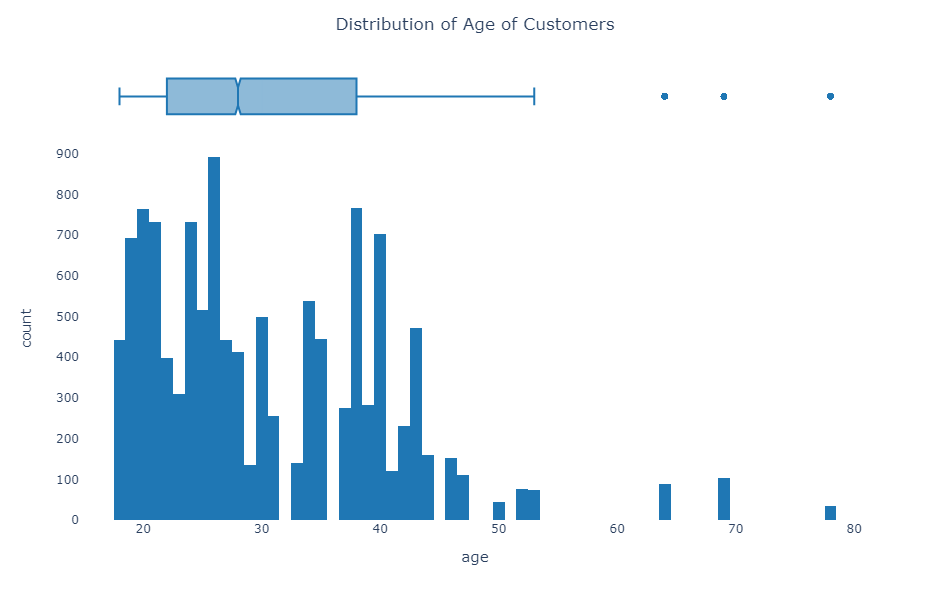

In [19]:
hist(data, 'age', "Distribution of Age of Customers", 'box')

---
>From the distribution above, the age range of customers who performed both debit and credit transactions are between `18 years` and `78 years`. Most of the transactions are performed by customers who are relatively young usually between the ages of `18 to 40 years` which is clearly buttressed by the average customer age of `28 years`. The distribution is skewed to the right and this is as a result of a couple of old aged customers at the tail of the distribution.
---

#### Question 2: What is the amount distribution of the customers?

We also want to look at the amount distribution for all the transactions. To do this we will use the `amount` column.

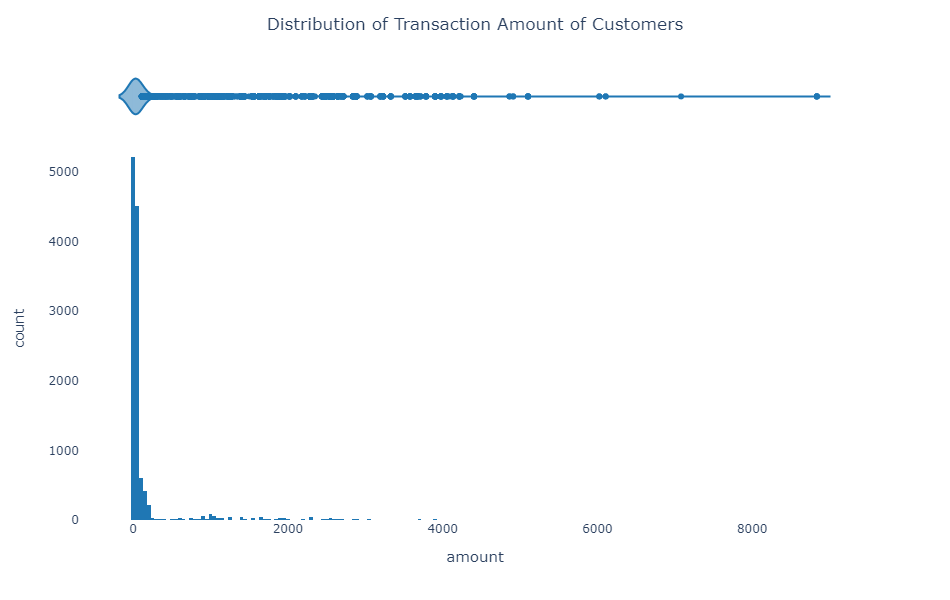

In [20]:
hist(data, 'amount', "Distribution of Transaction Amount of Customers", 'violin')

---
>Again, we can see that the distribution is right skewed with most of the transaction amount ranging between `0.1 - 225 AUD`. The average transaction amount is `29 AUD`. We have more outliers for this dataset because more of the customers had relatively huge transaction amounts.
---

#### Question 3: Are males performing more transactions as compared to females?

To answer this question we will use the `gender` column of our data to deduce the number of transactions.

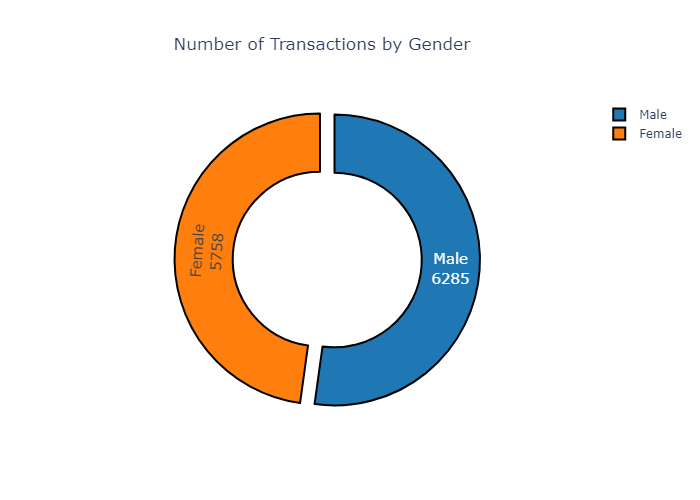

In [21]:
pie_chart(data, 'gender', ['Male', 'Female'], "Number of Transactions by Gender")

---
> The overall transactions were dominated by males with a percentage of `52.2%` that is almost `1000` transactions more than the females who accrued a percentage of about `48%`.
---

#### Question 4: Which transaction movement happens for most of the customers?

To answer this question we will use the `movement` column of our data to deduce the number of transactions.

In [22]:
tran_mode = data[['customer_id', 'movement', 'gender']]
trans = tran_mode.groupby(['movement', 'gender']).count()
trans.reset_index(inplace=True)
trans.rename(columns={'customer_id':'count'}, inplace=True)

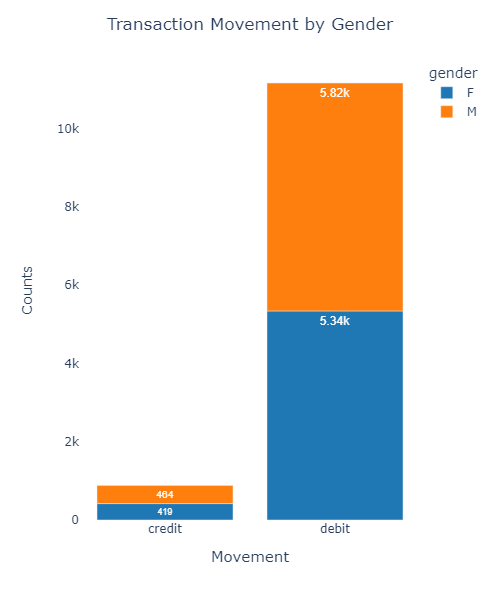

In [23]:
stacked_bar(trans, 'movement', 'count', 'gender', 'count', "Transaction Movement by Gender", 'Movement', 'Counts')

---
>From the bar graph, we can see that most of the transactions were debit transactions with the number of debit transactions approximately equal between males and females. If debit means deduction from an account, then we can assume that most of the customers are spending more than saving.
---

#### Question 5: What is the average spending by the customers?

For this question we will be using the `movement` and `amount` column. That said, we must note that we only talking about customer average spending which means, we looking at money moving out of their accounts. Therefore, we will only select transactions that resulted in a debit and then compute average amount for those transactions

In [24]:
# segmenting data for only debit transactions

debit_data = data[data['movement'] == 'debit']

We will go ahead and groupby each customer and then compute the average spending. We will be tempted to use the `first_name` column to groupby but that can result in erroneous output since multiple customers could have the same first name even though they are entirely different people. We will therefore perform the groupby on the `customer_id` which is unique to each customer.

In [25]:
deb_dat = debit_data[['customer_id', 'amount', 'first_name']]
dat = deb_dat.groupby(['customer_id', 'first_name']).mean().sort_values(by='amount', ascending=False)
dat.reset_index(inplace=True)

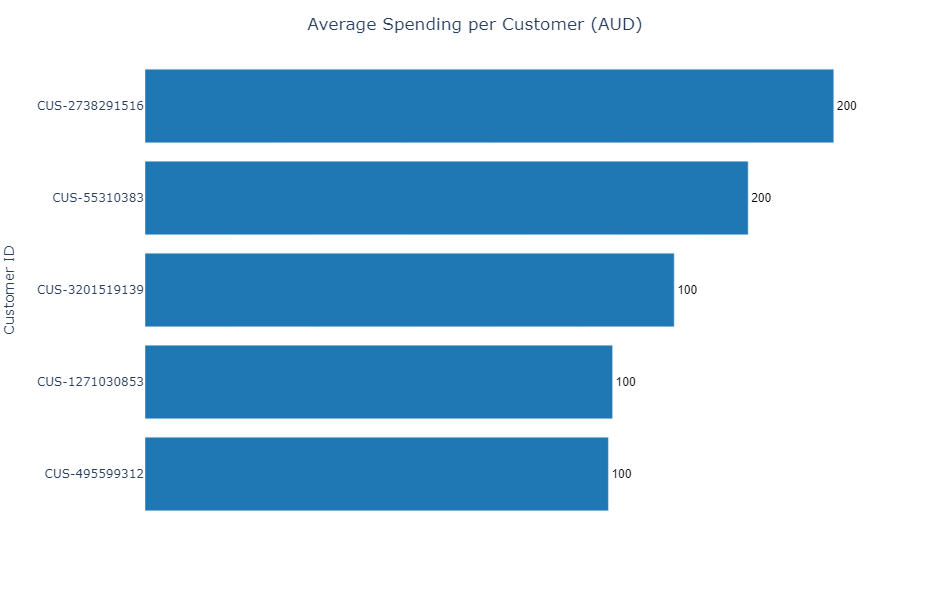

In [26]:
bar_chart(dat.head(), 'amount', 'customer_id', 'amount', "Average Spending per Customer (AUD)",'Amount' , 'Customer ID')

---
>The average spending varies from customer to customer depending on their needs. From our data and the time oulined in our data we can see that highest average spendor is `Richard` with customer id `CUS-1271030853` and he spends `183 AUD` on the average.
---

#### Question 6: Are most of these transactions authorized?

We will use the `status` column to answer this question.

In [27]:
tran_stat = data[['customer_id', 'status', 'gender']]
status = tran_stat.groupby(['status', 'gender']).count()
status.reset_index(inplace=True)
status.rename(columns={'customer_id':'count'}, inplace=True)

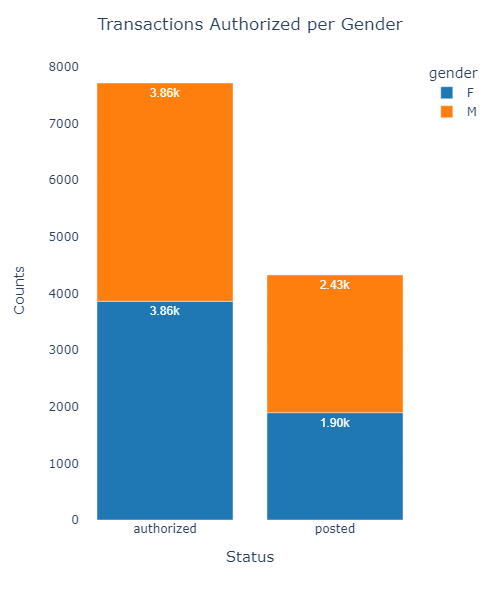

In [28]:
stacked_bar(status, 'status', 'count', 'gender', 'count','Transactions Authorized per Gender' ,'Status', 'Counts')

---
>Authorized transactions are transactions that have been approved and funds are pending to be removed from your account whereas posted transactions have already processed and the funds have been removed from your account. In relation to our analysis, we can see that most customers have performed transactions and the funds are yet to be deducted from their accounts. However, completed transactions are about `5000` approximately.
---

#### Question 7: Between males and females, who spend a lot on average?

Again, we are looking at the spending habit of customers but this time around we want to look at spending habits by gender. It is a common perception that women spend alot than men. Thus, we will find out if its true for this data. We will again use the `debit_data` we used the last time.

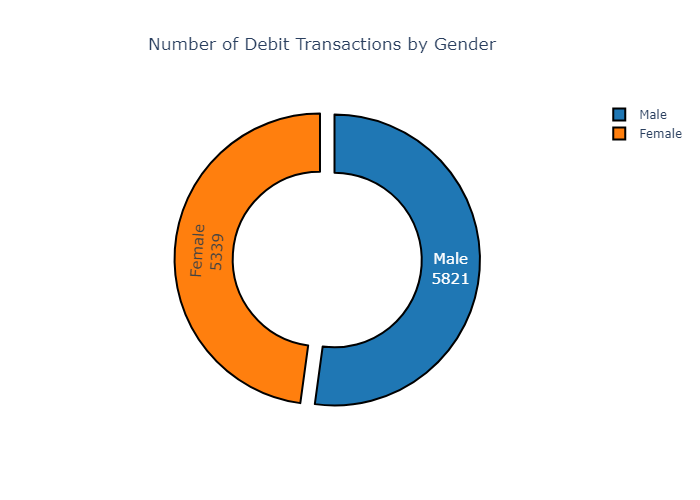

In [29]:
pie_chart(debit_data, 'gender', ['Male', 'Female'], "Number of Debit Transactions by Gender")

---
>This is interesting. We can see that the perception we had about spending habits of women is false based on our data but we cannot conclude on either perception because we only working with a sample data. Here we can see that the number of debit transactions performed by males exceeds that of the females by approximately `500` 
---

#### Question 8: Which suburb do most of the transactions take place?

We now want to look at debit transactions performed in each suburb. This will give us a clue as to which suburb do most customers spend their money. We will be using the `merchant_suburb` column from the debit data.

In [30]:
text = " ".join(str(review) for review in debit_data['merchant_suburb'].dropna())

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

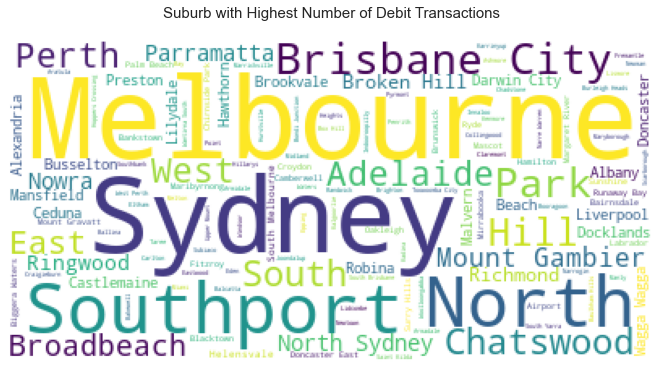

In [31]:
plt.figure(figsize = (9, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Suburb with Highest Number of Debit Transactions\n", size=15)
plt.tight_layout(pad = 0)
plt.show()

---
>It is not surprising that `Sydney` and `Melbourne` stand out as the suburbs that customers prefer to spend their money. An online [blog post](https://www.wsfm.com.au/entertainment/these-sydney-suburbs-are-spending-the-most-when-it-comes-to-online-shopping/) highlighted the spending habits in these two suburbs. We can also see other surburbs like `Brisbane City`, `Southport`, `Adelaide` etc.
---

#### Question 9: How does spending vary with state?

We will visualize the spending amount for each state. To do this we will use the `merchant_state` and `amount` columns of our data.

In [32]:
# reassigning the names of the states

new_state = {'QLD': 'Queensland', 'NSW': 'New South Wales', 'VIC': 'Victoria', 'WA': 'Western Australia', 
             'SA': 'South Australia', 'NT': 'Northern Territory', 'TAS': 'Tasmania', 'ACT': 'Australian Capital Territory'}


map_data = data[data['movement'] == 'debit']
map_data = map_data.replace({'merchant_state': new_state})

In [33]:
plot_map = map_data.loc[:, ['merchant_state', 'amount']]
now = plot_map.groupby('merchant_state').sum()
now.reset_index(inplace=True)

In [34]:
# load json file containing properties for each state
state = json.load(open('australian-states.min.geojson', 'r'))


# creating a mapping between id and states
state_id_map = {}
for feature in state['features']:
    state_id_map[feature['properties']['STATE_NAME']] = feature['id']
    
    
# assigning unique id to states in data 
now['id'] = now['merchant_state'].apply(lambda x: state_id_map[x])
now['id'] = now['id'].astype('Int64')

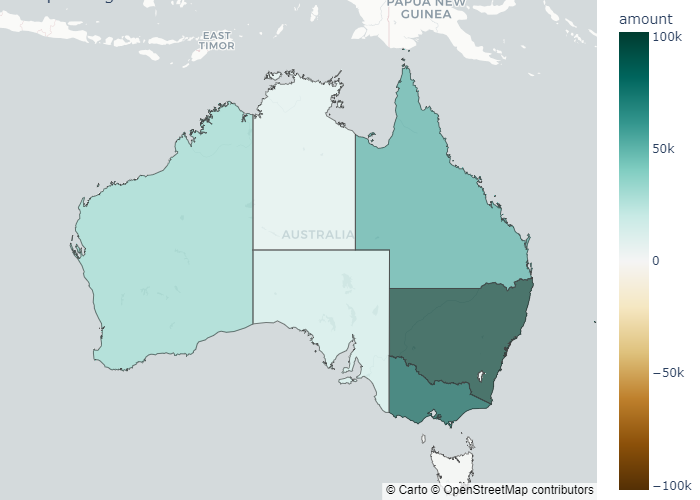

In [35]:
# plotting the map of debit transactions for each state

fig = px.choropleth_mapbox(
    now,
    locations="id",
    geojson=state,
    color="amount",
    hover_name="merchant_state",
    hover_data=["amount"],
    title="Spending Per State",
    mapbox_style="carto-positron",
    center={"lat": -26, "lon": 133},
    color_continuous_scale=px.colors.diverging.BrBG,
    color_continuous_midpoint=0,
    zoom=3,
    opacity=0.7,
)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show('png')

---
>We can see from the visualization above that `New South Wales` have the highest amount spent with a total amount of about `102,000 AUD` and they are closely followed by `Victoria` with an amount of approximately `88,000 AUD`. `Queensland`, `Western Australia`, `South Australia`, `Northern Territory` and `Tasmania` also follow in that order.
---

#### Question 10: How did the average amount spent by customers change over time ( days, weeks)?

Now we want to analyse the spending habits of customers over time. In this task we will look at spending habits over weeks and days. We will need the date and amount columns to answer this question.

In [36]:
dat = debit_data.loc[:, ['date', 'amount']]

In [37]:
# amount_per_day
amount_per_day = pd.DataFrame({'median' : dat.set_index('date').resample('D')["amount"].median()}).reset_index()

# amount per week
amount_per_week = pd.DataFrame({'median' : dat.set_index('date').resample('W')["amount"].median()}).reset_index()

# amount per month
amount_per_month = pd.DataFrame({'median' : dat.set_index('date').resample('M')["amount"].median()}).reset_index()

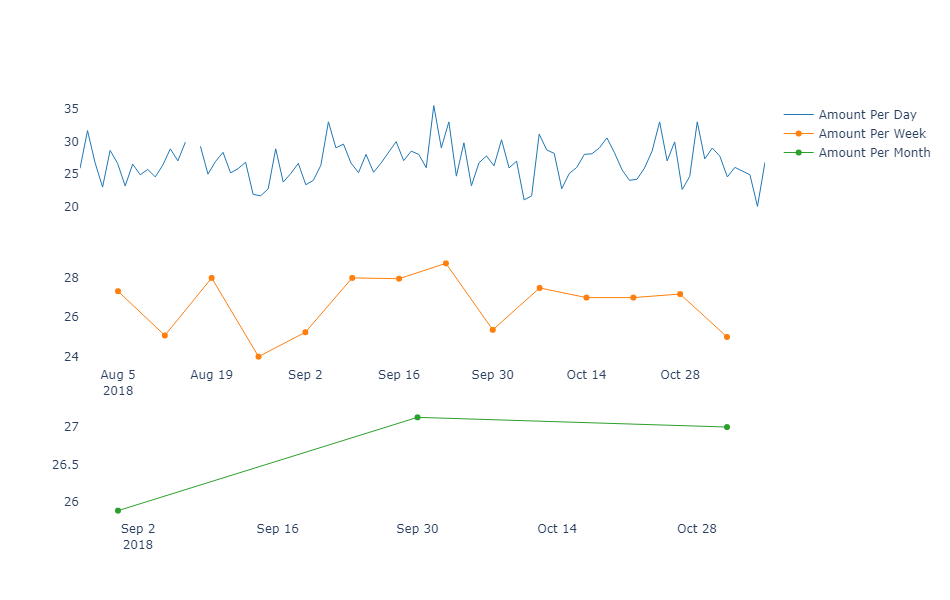

In [38]:
line_graph(amount_per_day, amount_per_week, amount_per_month, 'median', ['Amount Per Day', 'Amount Per Week', 'Amount Per Month'])

---
>There is no defined trend for daily average spending amount from the above visualization. However, we can see the highest average spend in a day was on Sept 17, 2018 with an amount of `35.5 AUD` and the lowest average spend was recorded on Oct 30, 2018 with an amount of `20 AUD`. We expect to see rise in spend during the festive periods and its a bit surprising that the average spend has not started peaking already instead we only see an average spend of about `25 AUD` as at 24 November, 2018. Also, there is no record for `August 16, 2018` which is a situation that will need further investigation. We must note that the distribution of the amount is skewed as we saw from the second question. Therefore, in order to properly analyze the average amount spend we opted to go with the median. . 

>For the weekly average spend, we can see a trend here. We realise that the average spend decreases for the last week of every month. It could be that most customer might have end up spending large portion of their salary and are now managing what's left thus the decrease in average spend in the final week. 

>The average spend per month was highest by the end of September, followed by October and then August.
---

## 4. Statistical Analysis<a id='sa'></a>

For this task we will further look into the question that was asked about the spending habit of customers based on their gender. We found out that the number of male customers performed a lot of debit transactions than their female counterparts. We will calculate the average amount spent by both genders and then conclude on which gender spends more using statistical analysis.

In [39]:
spend = debit_data[['amount', 'gender']]
spend_habit = spend.groupby(['gender']).mean()
spend_habit.reset_index(inplace=True)
spend_habit.rename(columns={'amount':'average_spend'}, inplace=True)

In [40]:
spend_habit

,gender,average_spend
0,F,49.946881
1,M,54.980407


From the above dataframe, we can see that the average spend for males is approximately `5 AUD` more than that of females. From this result we can easily conclude that males spend a lot as compared to females. However, what if the result could be due to more males than females, or vise versa but with high amount spent. We will therefore need to clearly conclude without any doubt that males spend more than females and that the difference is not due to chance. To do this we will perform hypothesis testing to draw conclusion  on the result.

In order to select a particular test to use, we will look at the distribution of the `amount` column. If the distribution is normal then we will go ahead and use the Welch's t-Test since there's unequal number of males and females. However, if the distribution is not normal, then we will transform the data and later apply the Welch's t-Test.

Lets go ahead and perform the normality test.

In [41]:
# selecting our data samples

male_spend = pd.DataFrame({'spend':list(spend[spend['gender']=='M']['amount'])})
female_spend = pd.DataFrame({'spend': list(spend[spend['gender']=='F']['amount'])})

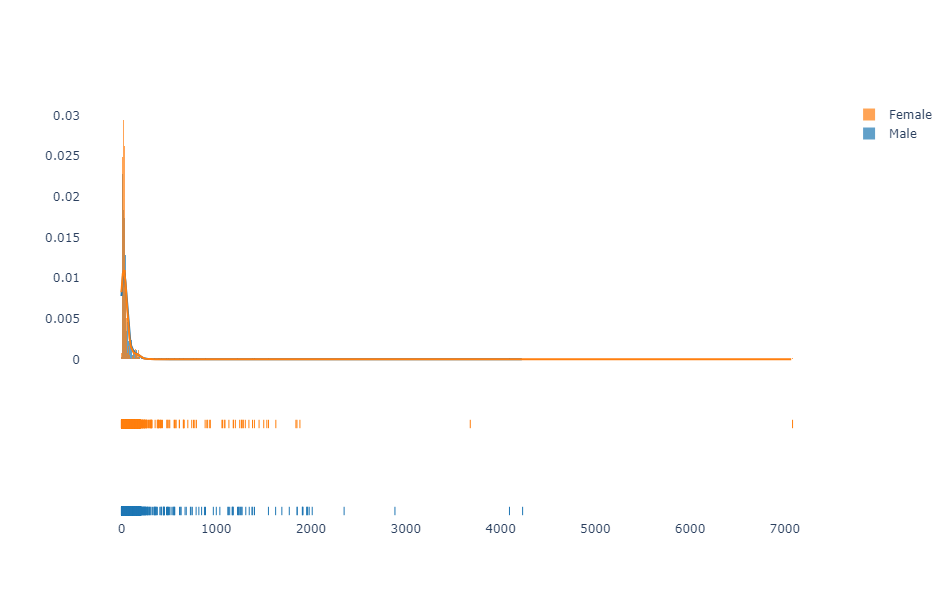

In [42]:
# creating displot for the data

x1 = male_spend['spend']
x2 = female_spend['spend']

hist_data = [x1, x2]
group_labels = ['Male', 'Female']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=1)
fig.update_layout(layout2)
fig.show('png')

---
>From the distribution above we can see that our data is skewed to the right which may be due to a lot of outliers in our data (rare spending value of customers). These outliers may affect the overall spending value of the customers and might lead to bias conclusions. In order to curb the impact of these outliers on our results, we will go ahead and remove them and then compute the averages again.
---

### 4.1 Removing Outliers<a id='ro'></a>

Lets go ahead and detect the outliers in our data. 

In [43]:
def remove_outlier(data, column):
    """
    Function that removes outliers from the dataframe

    Args:
        data : pandas dataframe
            Contains the data where the outliers are to be found
        column : str
            Usually a string with the name of the column
    
    Returns:
        None: prints number of outliers and then removes all the outliers
    """
    
    # calculate interquartile range
    q25, q75 = np.percentile(data[column], 25), np.percentile(data[column], 75)
    iqr = q75 - q25
    print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    indx = np.where((data[column] < lower) | (data[column] > upper))
    print('Identified outliers: %d' % len(indx[0]))
    
    # remove outliers
    data.drop(data.iloc[indx].index, inplace=True)
    print('Non-outlier observations: %d' % len(data))

In [44]:
print('Detecting Outliers for Male Spend')
print('----------------------------------\n')
remove_outlier(male_spend, 'spend')

print('\n\nDetecting Outliers for Female Spend')
print('----------------------------------\n')
remove_outlier(female_spend, 'spend')

Detecting Outliers for Male Spend
----------------------------------

Percentiles: 25th = 15.930, 75th = 46.000, IQR = 30.070
Identified outliers: 636
Non-outlier observations: 5185


Detecting Outliers for Female Spend
----------------------------------

Percentiles: 25th = 14.400, 75th = 43.910, IQR = 29.510
Identified outliers: 535
Non-outlier observations: 4804


From the results, we were able to detect and remove `1171` outliers in total using the interquartile range approach. We will now go ahead and look at the average spend and the resulting distribution.

In [45]:
print('Average Male Spend: {}'.format(male_spend['spend'].mean()))
print('Average Female Spend: {}'.format(female_spend['spend'].mean()))

Average Male Spend: 28.846183220829314
Average Female Spend: 26.873326394671107


After removing the outliers, still the average spend for male is greater than that of the females. We will proceed to check the distribution and perform the normality checks.

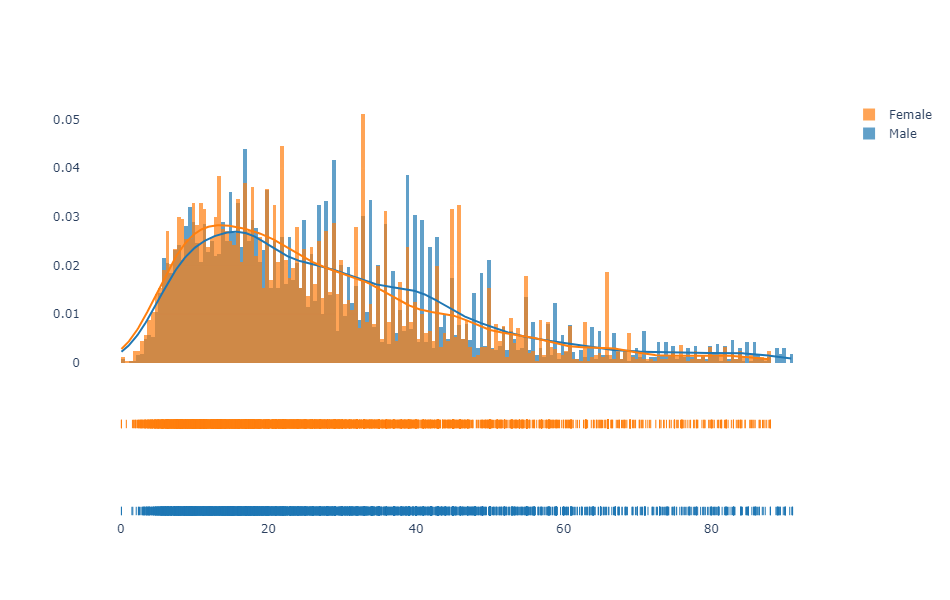

In [46]:
x1 = male_spend['spend']
x2 = female_spend['spend']

hist_data = [x1, x2]
group_labels = ['Male', 'Female']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5)
fig.update_layout(layout2)
fig.show('png')

From the graph above, we can see that the distribution for each gender is still skewed to the right. We will perform the normality test and perform all the needed transforms to make our distribution normal.

### 4.2 Normality Test<a id='nt'></a>

Even after removing the outliers, we can still see that the distribution is right skewed with high spedning values for both male and females. This gives us a clue that our data is not normally distributed but to quantify whether it is normal or not, we will go ahead and use the `Shapiro-Wilk test` if the data sample is greater than 1000 otherwise we will use `D'Agostino's K2` Test.

**`Normality Test`**

**Null hypothesis:** <br>
<br>
$H_0:$ `Distribution is normal`
<br>
<br>

**Alternative hypothesis:** <br>
<br>
$H_1:$ `Distribution is not normal`

<br>
<br>

**`Interpretation of Normality Test`**

- p-value $\leq$ alpha: significant result, reject null hypothesis, not Gaussian (H1).
- p-value $>$ alpha: not significant result, fail to reject null hypothesis, Gaussian (H0).

In [47]:
def normality(data, column):
    
    #if len(data) < 1000:
    print('------------------------------------')
    print('Using Shapiro-Wilk Test')
    print('------------------------------------\n')
    stat, p = shapiro(data[column])
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [48]:
print('Normality Test for Male Column:\n')
normality(male_spend, 'spend')
print('\n\n')

print('Normality Test for Female Column:\n')
normality(female_spend, 'spend')

Normality Test for Male Column:

------------------------------------
Using Shapiro-Wilk Test
------------------------------------

Statistics=0.918, p=0.000
Sample does not look Gaussian (reject H0)



Normality Test for Female Column:

------------------------------------
Using Shapiro-Wilk Test
------------------------------------

Statistics=0.917, p=0.000
Sample does not look Gaussian (reject H0)


The distribution for both male and female column is not normal which is expected because of the skewed distribution we saw earlier. In order to perform parametric hypothesis test we will need to transform the distribution to a normal distribution and in this case we will be using the `box-cox` transform.

### 4.3 Box-Cox Transformation<a id='bct'></a>

The Box-Cox method is a data transform method that is able to perform a range of power transforms, including the log and the square root. It can be thought of as a power tool to iron out power-based change in your data sample. The resulting data sample may be more linear and will better represent the underlying non-power distribution, including Gaussian.

In [49]:
# performing box-cox tranformation

male_spend['spend'], fitted_lambda = stats.boxcox(male_spend['spend'])
female_spend['spend'], fitted_lambda2 = stats.boxcox(female_spend['spend'])

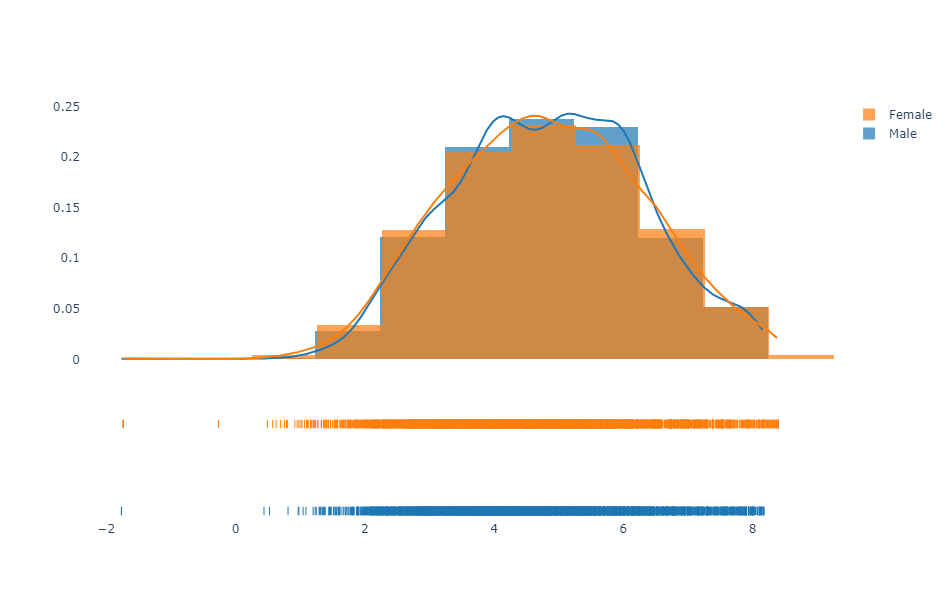

In [50]:
x1 = male_spend['spend']
x2 = female_spend['spend']

hist_data = [x1, x2]
group_labels = ['Male', 'Female']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=1)
fig.update_layout(layout2)
fig.show('png')

Now we can see that our distribution is roughly normal which satisfies the condition for performing Welch's t-Test.

### 4.4 Hypothesis Test - Welch's t-Test<a id='wt'></a>

Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. It is more reliable when the two samples have unequal variances and/or unequal sample sizes. In our case the number of male counts is greater than female counts which makes this test the best choice for testing our hypothesis.

The assumption or null hypothesis of the test is that the means of two populations are equal. A rejection of this hypothesis indicates that there is sufficient evidence that the means of the populations are different, and in turn that the distributions are not equal.
<br>
<br>

**`Welch's t-Test`**

**Null hypothesis:** <br>
<br>
$H_0:$`$μ_1$ = $μ_2$
<br>
<br>

**Alternative hypothesis:** <br>
<br>
$H_1:$ $μ_1$ $\neq$ $μ_2$

<br>
<br>

**`Interpretation of Welch's t-Test`**

- p-value $\leq$ alpha: `Different distributions (reject H0)`
- p-value $>$ alpha: `Same distributions (fail to reject H0)`

Now we will go ahead and perform the test. The only difference between the welch's t-test and student t-test is basically the difference in variance. The latter assumes the variance to be the same(homogeneity of variance) whereas the former doesn't. Therefore, we will use the scipy module `ttest_ind` but we will specify `equal_var` to be False.

In [51]:
stat, p = ttest_ind(x1, x2, equal_var=False)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=1.006, p=0.314
Same distributions (fail to reject H0)


Based on the outcome of the hypothesis test we can conclude there is no significant difference between the average spend for male and female customers. And this disproves our initial assumption that male spend more than females base on our data set. To properly use this result to estimate the entire population we will go ahead and compute the confidence interval for average spend for both male and female customers.

### 4.5 Effect Size<a id='es'></a>

But before we compute the confidence interval, we will want to know if there could possibly exist any difference, then how big will the difference in average spend be. We will do this by computing the effect size.

In [52]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    
    # calculate the effect size
    return (u1 - u2) / s

In [53]:
d = cohend(x1, x2)
print('Cohens d: %.3f' % d)

Cohens d: 0.020


---
>We can see that as expected, the difference between the means is approximately `0.02` standard deviation. This clearly tells us that the difference between these two groups is extremely small and totally insignificant. This further buttresses the result from the hypothesis test that, theres no difference in average spend between males and females.
---

### 4.6 Confidence Interval<a id='ci'></a>

Now that we know and can confidently say that there is no difference in average spend, how does this reflect in the entire population. How can we estimate the average spend for either customer at any point in time? This is where we need confidence interval to give us a range in which the average spend for each customer in a population will fall.

We will go ahead and compute the confidence interval for both male and female average spend. Now we must know that the values we going to get will be the transformed values. To get the average spend values, we will have to use `inverse box-cox` transformation on our data.

In [54]:
male_spend['spend'] = inv_boxcox(male_spend['spend'], fitted_lambda)
female_spend['spend'] = inv_boxcox(female_spend['spend'], fitted_lambda2)

In [55]:
x1 = male_spend['spend']
x2 = female_spend['spend']

In [56]:
# computing the confidence interval
print('-------------------------------------------------------------')
print('Confidence Interval - Average Spend Range for Male Customers')
print('-------------------------------------------------------------')
print('Confidence Interval: {}\n'.format(st.t.interval(alpha=0.95, df=len(x1)-1, loc=np.mean(x1), scale=st.sem(x1)))) 
      
print('-------------------------------------------------------------')
print('Confidence Interval - Average Spend Range for Female Customers')
print('-------------------------------------------------------------')
print('Confidence Interval: {}'.format(st.t.interval(alpha=0.95, df=len(x2)-1, loc=np.mean(x2), scale=st.sem(x2)))) 

-------------------------------------------------------------
Confidence Interval - Average Spend Range for Male Customers
-------------------------------------------------------------
Confidence Interval: (28.34548409389379, 29.34688234776485)

-------------------------------------------------------------
Confidence Interval - Average Spend Range for Female Customers
-------------------------------------------------------------
Confidence Interval: (26.382377217484876, 27.364275571857338)


---
>From the confidence interval, we can see that there is only a 5% chance that the true population average spend lies outside of the 95% confidence interval. That is, there’s only a 5% chance that the true population average for male spend is less than `28.35 AUD` or greater than `29.35 AUD` and the true population average for female spend is less than `26.38 AUD` or greater than `27.36 AUD`.
---

## 5. Feature Engineering and Selection<a id='fes'></a>

The better we prapare our data for the machine learning model, the better our prediction will be. In this task, we will properly prepare our data by transforming columns, dropping irrelevant columns, handling missing and categorical values and finally merging if the need be. 

We will first determine the best way to compute annual salary for the customers.

We must understand that the transaction dataset contains different types of transactions completed by each customer. Therefore in order to compute the salary for each customer we will have to filter our dataset to contain only salary transactions. To do this we will use the`txn_description` column.

In [57]:
filtered = data[data['txn_description'] == 'PAY/SALARY']
filtered.head()

,status,card_present_flag,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,longitude,latitude,merchant_longitude,merchant_latitude
50,posted,NaN,PAY/SALARY,NaN,Isaiah,8342.11,2018-08-01,M,23,NaN,NaN,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,credit,151.27,33.76,NaN,NaN
61,posted,NaN,PAY/SALARY,NaN,Marissa,2040.58,2018-08-01,F,23,NaN,NaN,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,credit,145.01,37.93,NaN,NaN
64,posted,NaN,PAY/SALARY,NaN,Eric,3158.51,2018-08-01,M,22,NaN,NaN,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,credit,151.18,33.80,NaN,NaN
68,posted,NaN,PAY/SALARY,NaN,Jeffrey,2517.66,2018-08-01,M,24,NaN,NaN,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,credit,145.00,37.83,NaN,NaN
70,posted,NaN,PAY/SALARY,NaN,Kristin,2271.79,2018-08-01,F,43,NaN,NaN,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,credit,144.95,37.76,NaN,NaN


In [58]:
filtered.nunique()

status                  1
card_present_flag       0
txn_description         1
merchant_id             0
first_name             80
balance               883
date                   65
gender                  2
age                    33
merchant_suburb         0
merchant_state          0
amount                100
transaction_id        883
customer_id           100
movement                1
longitude              87
latitude               85
merchant_longitude      0
merchant_latitude       0
dtype: int64

---
>Looking at the unique values we can clearly see that the transactions only pertain to salary transactions. That is, because its a salary transaction, we expect the status to be only `posted`. Also, the movement should be on `credit` since customer's account will be credited with their salaries. No merchant details because this is not a spending activity and as expected the customer ID is also 100.
---

Because the accounts of the customers were credited with their salaries, we will assume that customers were credited with the same amount of money at different intervals in the month for different customers. We will go ahead and get the total salary for each customer for the three months and multiply the results by 4 to obtain the annual salary. 

In [59]:
filtered[filtered['customer_id'] == 'CUS-1462656821']

,status,card_present_flag,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,transaction_id,customer_id,movement,longitude,latitude,merchant_longitude,merchant_latitude
50,posted,NaN,PAY/SALARY,NaN,Isaiah,8342.11,2018-08-01,M,23,NaN,NaN,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,credit,151.27,33.76,NaN,NaN
1826,posted,NaN,PAY/SALARY,NaN,Isaiah,10724.87,2018-08-15,M,23,NaN,NaN,3903.95,a0ba656db7c5441dbb782f4bbc6755ac,CUS-1462656821,credit,151.27,33.76,NaN,NaN
3553,posted,NaN,PAY/SALARY,NaN,Isaiah,13030.74,2018-08-29,M,23,NaN,NaN,3903.95,0d496e23bf2d461eb3ac886c1a16f3b4,CUS-1462656821,credit,151.27,33.76,NaN,NaN
5419,posted,NaN,PAY/SALARY,NaN,Isaiah,15523.69,2018-09-12,M,23,NaN,NaN,3903.95,4e8da0f42d534b919b2b5c045204d8cf,CUS-1462656821,credit,151.27,33.76,NaN,NaN
7291,posted,NaN,PAY/SALARY,NaN,Isaiah,17906.31,2018-09-26,M,23,NaN,NaN,3903.95,3885424223de46eb894231ee607c28f2,CUS-1462656821,credit,151.27,33.76,NaN,NaN
9162,posted,NaN,PAY/SALARY,NaN,Isaiah,21236.51,2018-10-10,M,23,NaN,NaN,3903.95,0726e97b3df44344b4b7d0f762d7801a,CUS-1462656821,credit,151.27,33.76,NaN,NaN
11035,posted,NaN,PAY/SALARY,NaN,Isaiah,24451.16,2018-10-24,M,23,NaN,NaN,3903.95,d14a8667671948e8b688486d2f97d97f,CUS-1462656821,credit,151.27,33.76,NaN,NaN


In [60]:
# computing the annual customer salary based on amount column

cust_salary = filtered.pivot_table(index='customer_id', values='amount', aggfunc=np.sum)
cust_salary.reset_index(inplace=True)
cust_salary['annual_salary'] = round(cust_salary['amount'] * 4, 2)

In [61]:
# filter relevant columns to be merged

relevant = filtered.loc[:, ['customer_id','age','gender']]
relevant.drop_duplicates(inplace=True)

In [62]:
# merge the created dataframes

cust_salary = pd.merge(cust_salary, relevant, on='customer_id')

We stated earlier in the hypothesis that, we could predict annual customer salary based on their age and spending habits. It will be better to include the annual spending amount for each customer in our data since that will help us make predictions. We know by now that we use the debit transactions to analyze the spending habits of customers so we will filter our data by the debit transactions. We will use the `debit data` we had during the EDA.

In [63]:
spend = debit_data.pivot_table(index='customer_id',values='amount', aggfunc=np.sum)
spend['annual_spend'] = round(spend['amount'] * 4, 2)
spend.reset_index(inplace=True)

In [64]:
# merge the created dataframes

cust_salary = pd.merge(cust_salary, spend.drop(columns=['amount']), on='customer_id')
cust_salary = cust_salary.rename(columns={'amount': 'credit_amount_3m'})

In [65]:
cust_salary['spending_ratio'] = round(cust_salary['annual_spend'] / cust_salary['annual_salary'], 2)

In [66]:
# glimpse of our data

cust_salary.head()

,customer_id,credit_amount_3m,annual_salary,age,gender,annual_spend,spending_ratio
0,CUS-1005756958,12616.11,50464.44,53,F,14611.44,0.29
1,CUS-1117979751,25050.55,100202.20,21,M,35735.28,0.36
2,CUS-1140341822,11499.06,45996.24,28,M,22046.16,0.48
3,CUS-1147642491,22248.07,88992.28,34,F,26931.00,0.30
4,CUS-1196156254,27326.11,109304.44,34,F,34898.44,0.32


In [67]:
cust_salary.to_csv('salary.csv', index=False)

Now that we have created new features and dropped the unneeded ones, we will go ahead and transform our data to make it ready for building our model. For this step we will perform two different tasks which are;

* One hot encoding of gender column

#### One Hot Enoding 

We will use pandas built-in method called **get_dummies()** to create dummy variables. The get_dummies method does have one issue - it will create a new column for each value in the DataFrame column. This will significantly reduce the predictive power of our model since `multicollinearity` will exist. To remove this, we can add the argument `drop_first = True` to the get_dummies method.

In [68]:
# converting categorical data 

gender = pd.get_dummies(cust_salary['gender'], prefix = 'gender', drop_first = True)

In [69]:
# merge the results to the cust_salary dataframe

cust_salary = pd.merge(cust_salary, gender, left_index=True, right_index=True)

In [70]:
# drop the categorical columns and other irrelevant columns

cust_salary.drop(columns=['gender', 'customer_id'], inplace=True)
cust_salary.head()

,credit_amount_3m,annual_salary,age,annual_spend,spending_ratio,gender_M
0,12616.11,50464.44,53,14611.44,0.29,0
1,25050.55,100202.20,21,35735.28,0.36,1
2,11499.06,45996.24,28,22046.16,0.48,1
3,22248.07,88992.28,34,26931.00,0.30,0
4,27326.11,109304.44,34,34898.44,0.32,0


## 6. Data Modeling<a id='dm'></a>

To remind ourselves, we stated earlier as one of the objectives to build a model that is able to predict annual salary of customers. Based on the methodology framework we saw at the beginning, we know that our problem continuous numeric prediction problem. We also highlighted that, we will have to build multiple models and then finally select the best one based on certain evaluation metrics. 

Therefore, to complete this task we will go through the various machine learning steps which includes;
* Loading Data
* Data Understanding
* Splitting Dataset
* Algorithm Evaluation
* Parameter Tuning
* Final Model
* Model Understanding

### 6.1 Data Understanding<a id='du'></a>

Now that we done loading our data, we will go ahead and clearly understand the data at our disposal. 

In this section, we will look at the structure of our data. Firstly, We will check the features present in our data and then we will look at their data types. 

#### 6.1.1 Descriptive Statistics<a id='ds'></a>

In [71]:
cust_salary.columns

Index(['credit_amount_3m', 'annual_salary', 'age', 'annual_spend',
       'spending_ratio', 'gender_M'],
      dtype='object')

We have 5 independent variables and 1 target variable which salary column.

In [72]:
# checking the data type for each column

cust_salary.dtypes

credit_amount_3m    float64
annual_salary       float64
age                   int64
annual_spend        float64
spending_ratio      float64
gender_M              uint8
dtype: object

We can see there is only one data type:
* **`float`:** variables with some decimal values involved. Apart from the ones mentioned above, the rest are float variables.

Lets now see the shape of our data

In [73]:
# get the shape of the data

cust_salary.shape

(100, 6)

---
>We have **`100`** rows and **`6`** columns including the target variable.
---

We will now look at the summary statistics of our data.

In [74]:
cust_salary.describe(include='all')

,credit_amount_3m,annual_salary,age,annual_spend,spending_ratio,gender_M
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,16765.768500,67063.074000,31.770000,23468.29400,0.377200,0.560000
std,6741.543716,26966.174864,11.544254,10455.85173,0.178371,0.498888
min,7155.960000,28623.840000,18.000000,3701.92000,0.100000,0.000000
25%,11591.332500,46365.330000,22.000000,15208.16000,0.260000,0.000000
50%,14813.485000,59253.940000,29.500000,22899.02000,0.330000,1.000000
75%,21332.515000,85330.060000,39.250000,28410.67000,0.480000,1.000000
max,35343.920000,141375.680000,78.000000,51462.72000,1.000000,1.000000


We will finally look at the correlation between the data columns and which pair correlates the most.

In [75]:
# checking the correlation coefficient

pd.set_option('precision', 2)
cust_salary.corr()

,credit_amount_3m,annual_salary,age,annual_spend,spending_ratio,gender_M
credit_amount_3m,1.00,1.00,-0.04,0.37,-0.38,0.10
annual_salary,1.00,1.00,-0.04,0.37,-0.38,0.10
age,-0.04,-0.04,1.00,-0.09,-0.03,0.01
annual_spend,0.37,0.37,-0.09,1.00,0.67,-0.07
spending_ratio,-0.38,-0.38,-0.03,0.67,1.00,-0.14
gender_M,0.10,0.10,0.01,-0.07,-0.14,1.00


---
> We can see a couple of weak correlated features. However we can clearly see that `annual_salary` is highly correlated with `credit_amount_3m`. We will have to drop this inorder to prevent `target leakage`.
---

#### 6.1.2 Data Visualization<a id='dv'></a>

In this step we will look at the final distribution for each column in our dataset. We expect the distribution for each dataset to be relatively normal with some being slightly skewed.


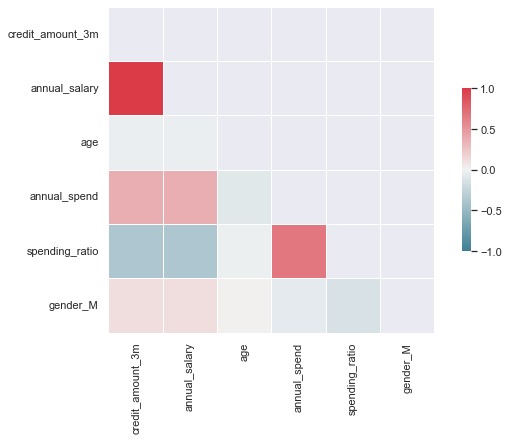

In [76]:
# Correlation Plot using seaborn

# Compute the correlation matrix
corr = cust_salary.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin= -1.0, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()    

The traingular scatter matrix depicts varying results in terms of correlation between features in our data. Most correlation coefficient are either 0 or close to 0. We can also see a number of strong positive and negative correlation between some of the features. We can see that `credit_amount_3m` seems to be highly correlated with the target variable and we will inspect that using the pairplot function from seaborn.

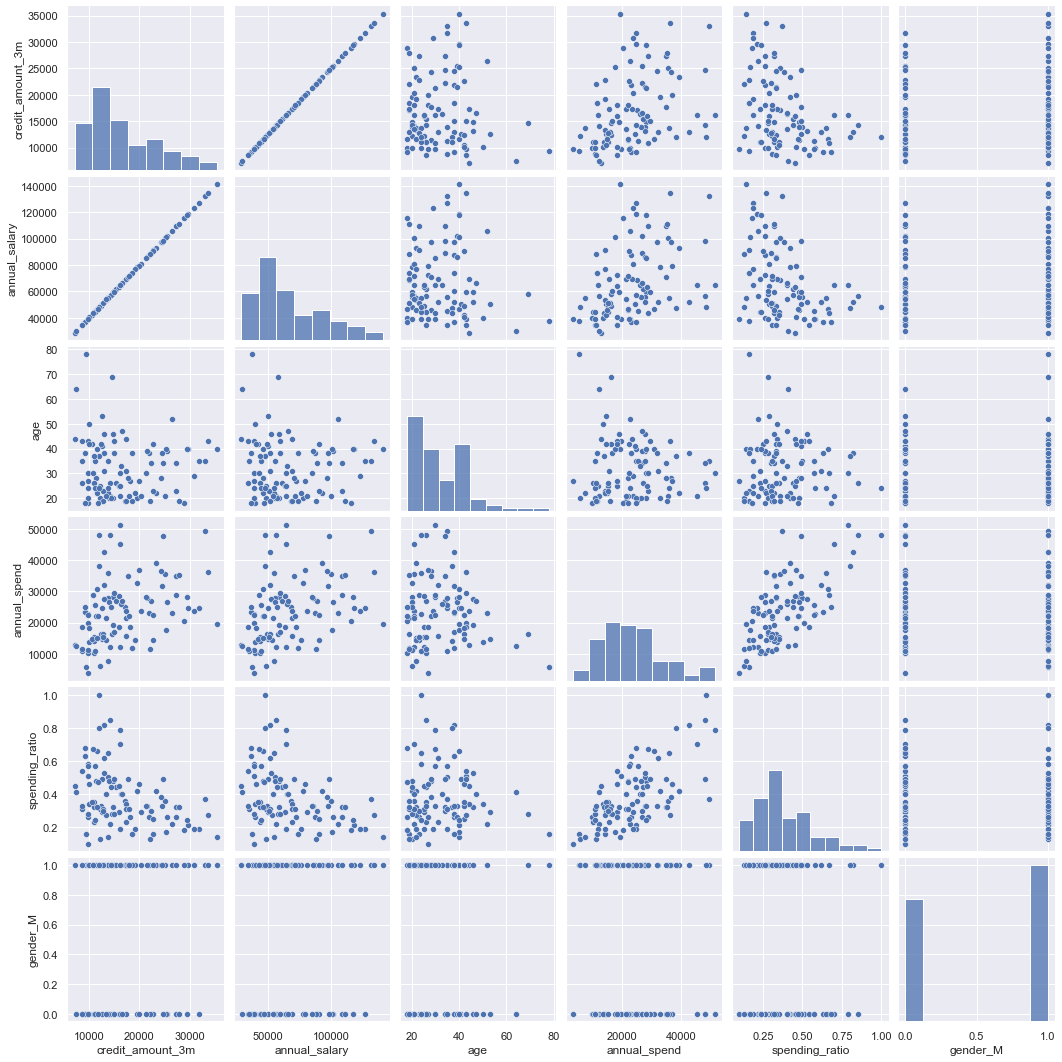

In [77]:
sns.pairplot(cust_salary)
plt.show()

We can now see the almost perfect correlation between `credit_amount_3m` column and the `salary` column. This is not good for training since the algorithm will learn the pattern for that specific column and use that for predicition making the model more sensitive to `credit_amount_3m` column and less stable. You can read more [here](https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e)

We will go ahead and drop the highly correlated column.

In [78]:
cust_salary.drop(columns=['credit_amount_3m'], inplace=True)

### 6.2 Splitting Dataset<a id='sd'></a>

It is a good idea to use a test hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

We will begin by importing the needed libraries to train our model.

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
import pickle

In [80]:
# Split-out test dataset

array = cust_salary.values

x = array[:, 1:]
y = array[:, 0]
validation_size = 0.20
seed = 7

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

### 6.3 Algorithm Evaluation<a id='ae'></a>

We don't know which algorithms will do well on this dataset. Gut feel suggests Linear Regression and Random Forest will do well. We will use 10-fold cross validation to evaluate the algorithms.

We will evaluate algorithms using the MAE metric. This is a gross metric that will give a quick idea of how great the error is. 

In [81]:
# Test options and evaluation metric

num_folds = 10
seed = 7
scoring = 'neg_mean_absolute_error'

In [82]:
# Spot-Check Algorithms

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

The algorithms all use default tuning parameters. Let's compare the algorithms. We will display the NMAE and standard deviation of errors for each algorithm as we calculate it and collect the results for use later.

In [83]:
# evaluate each model in turn

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -7937.425008 (2445.919042)
LASSO: -7936.523095 (2449.696550)
EN: -20428.958081 (6928.681741)
KNN: -21035.015400 (6967.508029)
CART: -10700.633000 (3908.259796)
SVR: -21799.217994 (8807.821886)


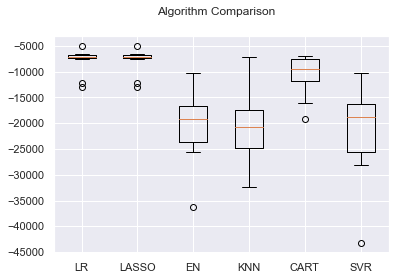

In [84]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We will now evaluate the algorithms on a standardized dataset

In [85]:
# Standardize the dataset

pipes = []
pipes.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipes.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipes.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipes.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipes.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipes.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

In [86]:
results = []
names = []
for name, model in pipes:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -7937.425008 (2445.919042)
ScaledLASSO: -7937.329143 (2447.150823)
ScaledEN: -15368.329289 (6691.431329)
ScaledKNN: -14815.256900 (6158.455256)
ScaledCART: -11615.565000 (4970.765963)
ScaledSVR: -21798.185415 (8807.319422)


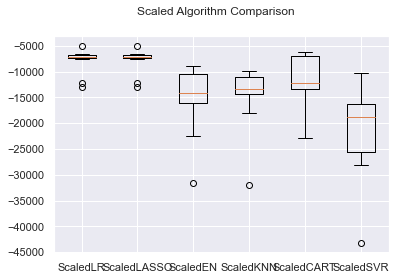

In [87]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We will also go ahead and evaluate ensemble methods algorithms

In [88]:
# ensembles

e_pipes = []
e_pipes.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
e_pipes.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
e_pipes.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
e_pipes.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

In [89]:
results = []
names = []
for name, model in e_pipes:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -11470.210939 (2988.290744)
ScaledGBM: -7225.572209 (2338.694844)
ScaledRF: -9008.437600 (3025.014327)
ScaledET: -6536.299375 (3514.373598)


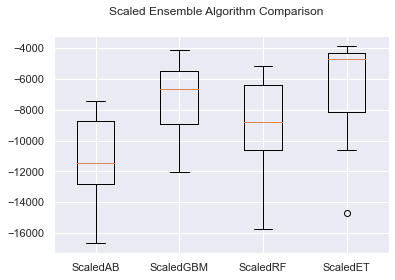

In [90]:
# Compare Algorithms

fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Based on the above algorithm evaluation, we see that `LR`, `LASSO`, `XGB`, `GBM` and `ET` are likely to produce models with good `mae` values. However, we can see that the `extratreeregressor` is likely to produce lower error score as compared to the other algorithms and upon closer look at the boxplot above, we can also see that it has the potential to decrease further with less variation. We therefore conclude that ExtraTreeRegressor is the best algorithm for this dataset and likely to be stable based on the standard deviation.

### 6.4 Parameter Tuning<a id='pt'></a>

Since we have decided to use the `ExtraTreeRegressor` for our dataset, in this step, we will go ahead and find the best parameters that should be used to train our model. We will be evaluating `GridSearch` methods.

In [91]:
# Tune scaled ET

pipe = Pipeline([('scale', StandardScaler()), ('et', ExtraTreesRegressor(random_state=seed))])
param_grid = {'et__n_estimators': [50, 100, 150, 200]}

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(pipe, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -6066.961865 using {'et__n_estimators': 100}


---
> From the results above, we can see that the best `NMAE` value is attained when the number of estimates is 100. As a result we will go ahead and build the model using that parameter.
---

### 6.5 Final Model<a id='fm'></a>

The ExtraTreesRegressor algorithm showed the most promise as a stable model and with lower error score for this problem. In
this section we will finalize the model by training it on the entire training dataset and make predictions for the hold-out test dataset to confirm our findings.

In [92]:
# prepare the model
model = ExtraTreesRegressor(random_state=seed, n_estimators=100)

my_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
my_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ExtraTreesRegressor(random_state=7))])

In [93]:
# make prediction

predictions = my_pipeline.predict(x_test)

We will go ahead and plot the scatterplot and histogram to help us compare the prediction array with the values in the `y_test` array. This will reveal to us how well our model is performing.

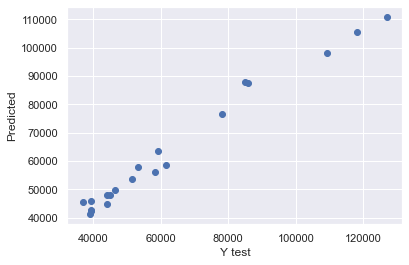

In [94]:
plt.scatter(y_test, predictions)
plt.ylabel('Predicted')
plt.xlabel('Y test')
plt.show()

In [95]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('R2: {}'.format(r2_score(y_test, predictions)))

MAE: 4825.961939999996
MSE: 39497442.508542515
RMSE: 6284.699078598952
R2: 0.947450137089069


### 6.6 Model Understanding<a id='mu'></a>

In this final step, we will explain the results we had above from the model and then check which of our features are of great importance when it comes to predicting annual salary of customers. We highlighted at the beginning of this project that, `age`and `customer spending behaviour` can help us predict the annual salaries of customers. Therefore, we will evaluate this hypothesis to find our if its true.

We will begin by checking which feature really impacted our model.

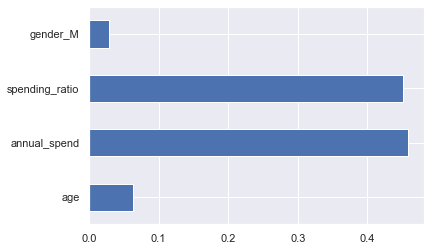

In [96]:
# plot feature importance

feat = my_pipeline.steps[1][1].feature_importances_
feat_importances = pd.Series(feat, index=cust_salary.drop(columns=['annual_salary']).columns)
feat_importances.plot(kind='barh')
plt.show()

### 6.7 Save Model<a id='sm'></a>

The final step after evaluating our model and checking the performance is to save model to be used for deployment. Now we will go ahead and save our model to a pickle file.

In [97]:
# saving model to pickle file

with open('model_pkl', 'wb') as file:
    pickle.dump(my_pipeline, file)

**Results Summary:**

* The accuracy of the final model is approximately 95% and the MAE is approximately 4825
* Distribution of the difference between the expected values and the predicted values is almost normally distributed which indicates that the final model is suitable for predicting the annual salaries of customers.
* There is a strong correlation with value of about `0.95`between the actual salaries and the predicted salaries. Again, this indicates how close our model's prediction is to the actual values.
* Finally, the feature importance revealed that `annual_spend` and `spending_ratio` are the big influencers of the model's predictions

### 7. Conclusion and Recommendation<a id='cr'></a>

Before the beginning of this project, we set out to achieve 2 main goals based on the dataset we had available. The goals were;
* Segment dataset and draw unique insights, including visualization of the transaction volume and assessing the effect of any outliers.
* Explore correlation between customer attributes and build a regression and a decision-tree prediction model based on your findings. 

At the end of this project, we were able to draw unique insights from the dataset by answering about 10 questions. Some of the insights generated were:
* Most of the transactions were performed by customers who were relatively young and between the ages of `18-40yrs`
* We also found that the average transaction amount was about `29 AUD`
* Also, `52.2%` of the overall transactions were completed by males as compared to `48%` for females.
* Out of the percentage stated above, most of transactions per gender were debit transactions which clearly shows most customers are spending than earning.
* Again, out of the overall number of transactions, only `5000` were actually posted, in order words completed whereas the rest were authorized and still waiting for funds to be deducted from account.
* Male spenders were approximately`500` more than their female counterparts. However, the statistical analysis we performed showed that there was no difference in their average spend.
* We also found out that `Sydney` and `Melbourne` are the top two suburbs where debit transactions take place a lot. Also, New South Wale was found to be the state where spending was highest.
* We also discovered that, spending decreases slightly towards the end of the month.
* Finally, based on the hypothesis test we performed, we found out that males and females spend the same amount averagely except that the amount may vary day by day. We concluded with `95%` confidence that average spend for males will mostly fall between `28.35 AUD` and `29.35 AUD` whereas that of females will fall between `26.38 AUD` and `27.36 AUD`.

To add, we went ahead to evaluate various algorithms and finally selected the `ExtraTreeRegressor` algorithm which was used to build a model that can predict the salary of potential customers with `95%` accuracy.

We also hypothesized that customer salary can be estimated based on `age` and `purchasing` habits of customers. In the end we found out that the major factors for predicting customer salary were `annual_spend` and `spending_ratio` which confirms the purchasing habit but age only had a `6.3%` impact on predictions. 

Despite the high accuracy for salary prediction we had a very high RMSE value which could be as a result of the fact that the data we used was not that rich. Therefore, to reduce the RMSE we recommend we train the model with a rich data. Nothing changes with the steps, but just the data that will be used to train the algorithm. 

In conclusion, we can confidently say that we have achieved our 2 main goals and have also tested our inital hypothesis.

### 8. References<a id='r'></a>

* [Scikit Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)
* [Machine Learning Mastery](https://machinelearningmastery.com/extra-trees-ensemble-with-python/)
* [Towards Data Science](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
* [Plotly Mapbox](https://plotly.com/python/mapbox-county-choropleth/)
